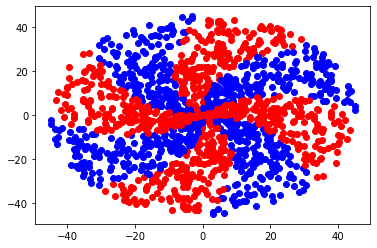

In [1]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

np.random.seed(0)

X_coordinate = []
Y_coordinate = []
res = []

# Blue --> 1
for angle in range(45): 
    theta = 0
    while(theta <= 45):
        r = theta
        X_coordinate.append(r*math.cos(2*math.pi*(theta+angle)/360))
        Y_coordinate.append(-r*math.sin(2*math.pi*(theta+angle)/360))
        res.append(1)
        X_coordinate.append(-r*math.cos(2*math.pi*(theta+angle)/360))
        Y_coordinate.append(r*math.sin(2*math.pi*(theta+angle)/360))
        res.append(1)
        theta+=random.randint(1,20)
        
# Red --> 0
for angle in range(45): 
    theta = 0
    while(theta <= 45):
        r = theta
        X_coordinate.append(r*math.cos(2*math.pi*(theta+angle+45)/360))
        Y_coordinate.append(-r*math.sin(2*math.pi*(theta+angle+45)/360))
        res.append(0)
        X_coordinate.append(-r*math.cos(2*math.pi*(theta+angle+45)/360))
        Y_coordinate.append(r*math.sin(2*math.pi*(theta+angle+45)/360))
        res.append(0)
        theta+=random.randint(1,20)
        
# Blue --> 1
for angle in range(45): 
    theta = 0
    while(theta <= 45):
        r = theta
        X_coordinate.append(r*math.cos(2*math.pi*(theta+angle+90)/360))
        Y_coordinate.append(-r*math.sin(2*math.pi*(theta+angle+90)/360))
        res.append(1)
        X_coordinate.append(-r*math.cos(2*math.pi*(theta+angle+90)/360))
        Y_coordinate.append(r*math.sin(2*math.pi*(theta+angle+90)/360))
        res.append(1)
        theta+=random.randint(1,20)
        
# Red --> 0
for angle in range(45): 
    theta = 0
    while(theta <= 45):
        r = theta
        X_coordinate.append(r*math.cos(2*math.pi*(theta+angle+135)/360))
        Y_coordinate.append(-r*math.sin(2*math.pi*(theta+angle+135)/360))
        res.append(0)
        X_coordinate.append(-r*math.cos(2*math.pi*(theta+angle+135)/360))
        Y_coordinate.append(r*math.sin(2*math.pi*(theta+angle+135)/360))
        res.append(0)
        theta+=random.randint(1,20)
        
for i in range(len(res)):
    if res[i] == 1:
        plt.plot(X_coordinate[i], Y_coordinate[i], "bo")
    else:
        plt.plot(X_coordinate[i], Y_coordinate[i], "ro")

In [2]:
X = np.zeros(shape=(len(res),2))
Y = np.zeros(shape=(len(res),1))

for i in range(len(res)): 
    X[i] = [X_coordinate[i],Y_coordinate[i]]
    Y[i] = [res[i]]
    
# X
# Y

In [3]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.0000001
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def ReLU(self, x, der=False):
        if der == True:
            return 1. * (x > 0)
        else:
            return x * (x > 0)
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.ReLU(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.ReLU(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.ReLU(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.ReLU(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

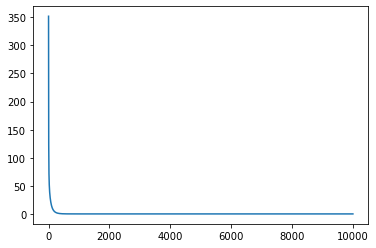

In [4]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)